In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 
from scipy import stats
from scipy.stats import norm, skew
from sklearn import metrics
import os

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [2]:
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

/tmp/ipykernel_33/210858191.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['SalePrice']);
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


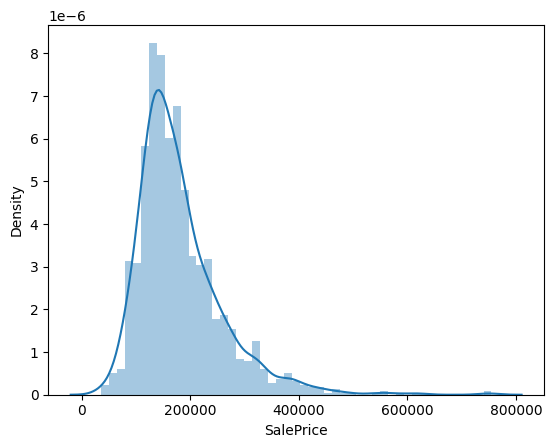

In [3]:
sns.distplot(train['SalePrice']);



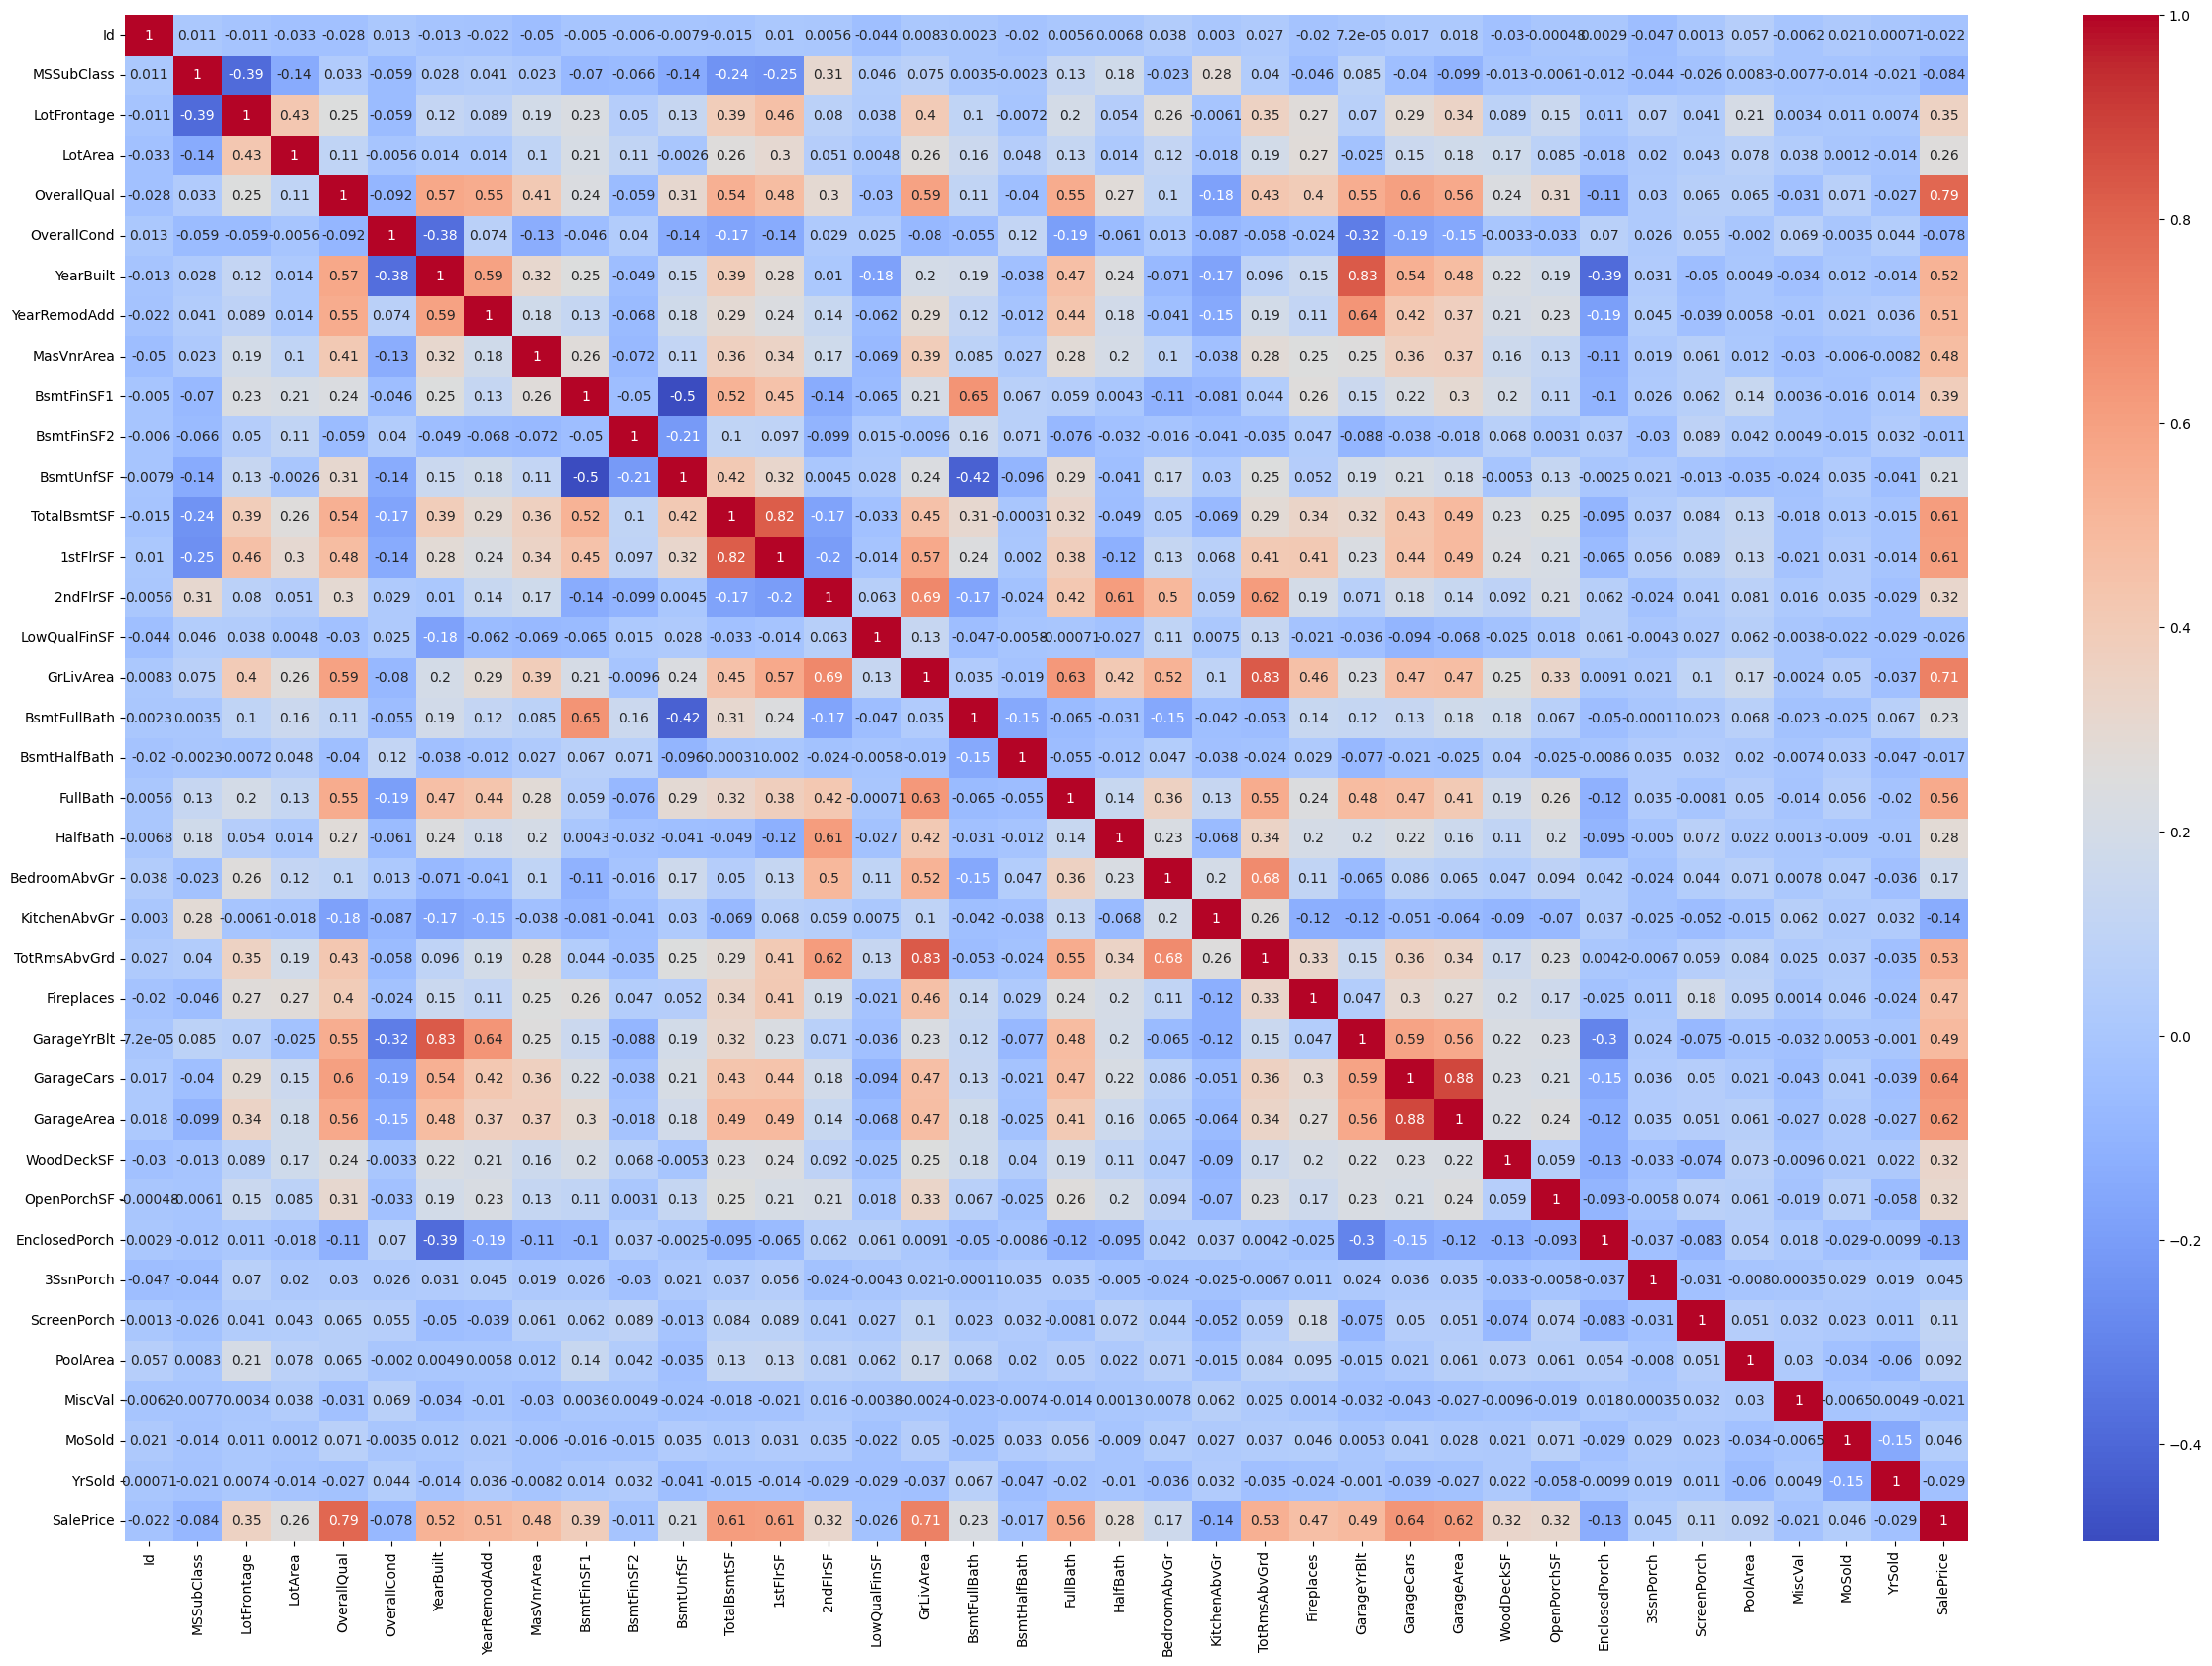

In [4]:
num_cols = train.select_dtypes(exclude='object')
plt.figure(figsize=(30,20))
sns.heatmap(num_cols.corr(),cmap='coolwarm',annot = True)
plt.show()

In [5]:
corr = num_cols.corr()
corr

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,...,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
MSSubClass,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,...,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,...,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,...,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQual,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,...,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCond,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,...,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
YearBuilt,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,...,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,...,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,...,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,...,0.204306,0.111761,-0.102303,0.026451,0.062021,0.140491,0.003571,-0.015727,0.014359,0.386420


In [6]:
corr[corr['SalePrice']>0.3].index

Index(['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice'],
      dtype='object')

In [7]:
train = train[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'SalePrice']]
test=test[['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea',
       'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'FullBath', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF']]

In [8]:
total = train.isna().sum().sort_values(ascending=False)
total = (total/train.shape[0])*100
total

LotFrontage     17.739726
GarageYrBlt      5.547945
MasVnrArea       0.547945
FullBath         0.000000
OpenPorchSF      0.000000
WoodDeckSF       0.000000
GarageArea       0.000000
GarageCars       0.000000
Fireplaces       0.000000
TotRmsAbvGrd     0.000000
GrLivArea        0.000000
OverallQual      0.000000
2ndFlrSF         0.000000
1stFlrSF         0.000000
TotalBsmtSF      0.000000
BsmtFinSF1       0.000000
YearRemodAdd     0.000000
YearBuilt        0.000000
SalePrice        0.000000
dtype: float64

In [9]:
miss_cols = [col for col in total.index if total[col] > 0]
miss_cols
for col in miss_cols:
    train[col] = train[col].fillna(train[col].mean())

train.isna().sum()

LotFrontage     0
OverallQual     0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
BsmtFinSF1      0
TotalBsmtSF     0
1stFlrSF        0
2ndFlrSF        0
GrLivArea       0
FullBath        0
TotRmsAbvGrd    0
Fireplaces      0
GarageYrBlt     0
GarageCars      0
GarageArea      0
WoodDeckSF      0
OpenPorchSF     0
SalePrice       0
dtype: int64

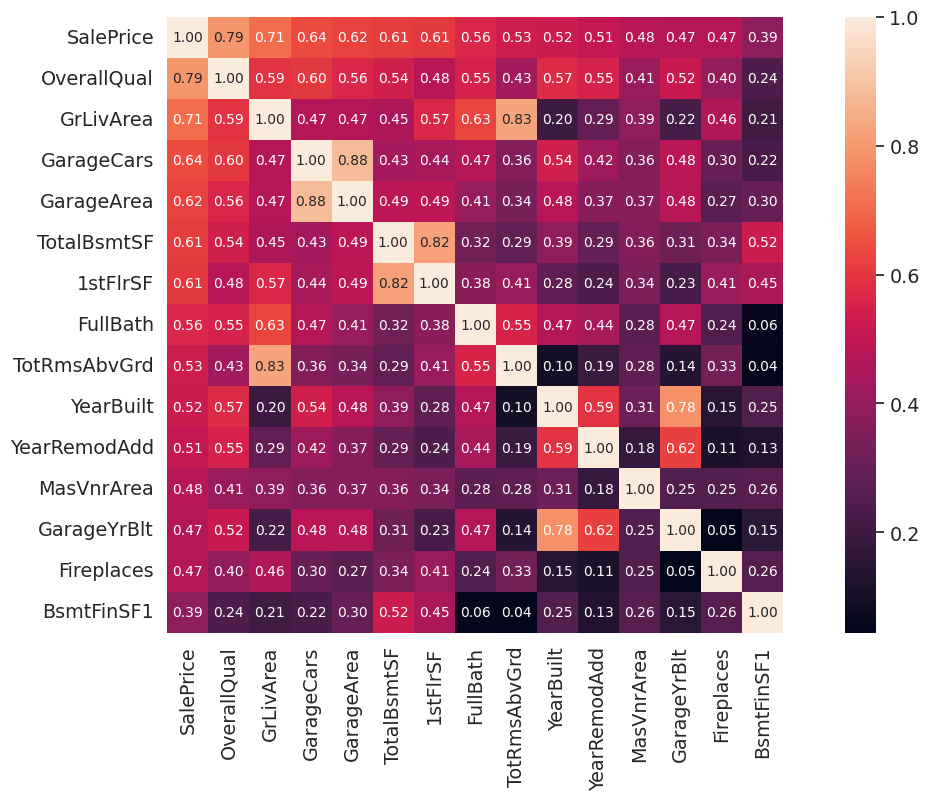

In [10]:
k = 15 #number of variables for heatmap
plt.figure(figsize=(16,8))
corrmat = train.corr()
# picking the top 15 correlated features
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(train[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [11]:
train = train[cols]
cols

Index(['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1'],
      dtype='object')

In [12]:
test = test[cols.drop('SalePrice')]

In [13]:
test.head()

,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,5,896,1.0,730.0,882.0,896,1,5,1961,1961,0.0,1961.0,0,468.0
1,6,1329,1.0,312.0,1329.0,1329,1,6,1958,1958,108.0,1958.0,0,923.0
2,5,1629,2.0,482.0,928.0,928,2,6,1997,1998,0.0,1997.0,1,791.0
3,6,1604,2.0,470.0,926.0,926,2,7,1998,1998,20.0,1998.0,1,602.0
4,8,1280,2.0,506.0,1280.0,1280,2,5,1992,1992,0.0,1992.0,0,263.0


In [14]:
miss_test = test.isnull().sum().sort_values(ascending=False)
miss_val_test = [col for col in miss_test.index if miss_test[col]>0]
miss_val_test

['GarageYrBlt',
 'MasVnrArea',
 'GarageCars',
 'GarageArea',
 'TotalBsmtSF',
 'BsmtFinSF1']

In [15]:
for i in miss_val_test:
    test[i] = test[i].fillna(test[i].mean())
test.isnull().sum().sort_values(ascending=False)

OverallQual     0
GrLivArea       0
GarageCars      0
GarageArea      0
TotalBsmtSF     0
1stFlrSF        0
FullBath        0
TotRmsAbvGrd    0
YearBuilt       0
YearRemodAdd    0
MasVnrArea      0
GarageYrBlt     0
Fireplaces      0
BsmtFinSF1      0
dtype: int64

**Linear Regression** 

Let's now begin to train out regression model! We will need to first split up our data into an X array that contains the features to train on, and a y array with the target variable, in this case the Price column. We will toss out the Address column because it only has text info that the linear regression model can't use

In [16]:
# X = train.drop('SalePrice', axis=1)
# y=train.SalePrice

In [17]:
# from sklearn.preprocessing import StandardScaler
# import numpy as np

# sc = StandardScaler()
# X = sc.fit_transform(X)

# # Convert y to a NumPy array and reshape it to a 2D array with one column
# y = np.array(y).reshape(-1, 1)
# y = sc.fit_transform(y)


In [226]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(train.drop('SalePrice', axis=1), train['SalePrice'], test_size=0.2, random_state=42)

In [19]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [227]:
y_train= y_train.values.reshape(-1,1)
y_test= y_test.values.reshape(-1,1)

from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
sc_X = RobustScaler()
sc_y = RobustScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.fit_transform(X_test)
# y_train = sc_X.fit_transform(y_train)
# y_test = sc_y.fit_transform(y_test)

In [228]:
X_train

array([[-0.5       , -0.24603482, -1.        , ..., -0.5514401 ,
        -1.        ,  0.74549237],
       [ 0.        ,  0.1516441 ,  0.        , ...,  0.37163682,
         0.        , -0.5332871 ],
       [-0.5       , -1.04758221, -2.        , ...,  0.        ,
        -1.        , -0.5332871 ],
       ...,
       [-0.5       , -0.94235977,  0.        , ..., -0.5514401 ,
        -1.        , -0.30166436],
       [ 0.5       , -0.07272727, -1.        , ..., -1.37195292,
         0.        , -0.5332871 ],
       [ 0.5       ,  0.12688588,  1.        , ...,  0.73061118,
         0.        , -0.5332871 ]])

In [229]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

# Create an instance of the Linear Regression model
lm = LinearRegression()

# Perform cross-validation
# 'cv' parameter specifies the number of folds (e.g., 5-fold cross-validation)
# 'scoring' parameter specifies the evaluation metric (e.g., 'neg_mean_squared_error')
# 'X' is your feature matrix and 'y' is your target variable
scores = cross_val_score(lm, X_train, y_train, cv=5, scoring='neg_mean_squared_error')

# Convert the negative mean squared error scores to positive values
mse_scores = -scores

# Print the mean squared error scores for each fold
print("Mean Squared Error Scores:", mse_scores)

# Calculate the mean and standard deviation of the mean squared error scores
mean_mse = mse_scores.mean()
std_mse = mse_scores.std()
print("Mean MSE:", np.sqrt(mean_mse))
print("Standard Deviation of MSE:", std_mse)


Mean Squared Error Scores: [1.32667315e+09 1.46323763e+09 2.99242422e+09 9.40765032e+08
 8.25680647e+08]
Mean MSE: 38855.58051790885
Standard Deviation of MSE: 777907212.3034432


In [230]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)


LinearRegression()

In [231]:
print(lm.coef_)

[[38030.56961467 23646.6861863  12022.04275838  1938.43315265
   3492.72410101  4601.26153625 -2607.98513563  4150.6004708
   8032.59512977 13976.71521778  3531.71184492  2992.79415117
   9167.92251841 13624.60301044]]


In [232]:
print(lm.intercept_)

[180064.12113516]


**Predictions**

In [233]:
predictions = lm.predict(X_test)
#predictions = predictions.reshape(-1, 1)

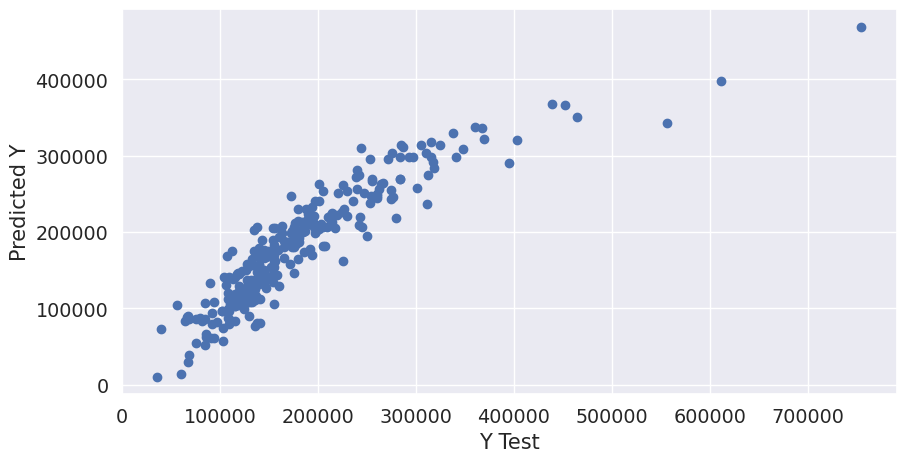

In [234]:
plt.figure(figsize=(10,5))
plt.scatter(y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [235]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 24606.335622966926
MSE: 1423630049.9060385
RMSE: 37731.02238087432


In [236]:
# # Select the subset of features for the first row
# first_row = train[cols].iloc[[0]].drop('SalePrice', axis=1)

# # Display the first row
# display(first_row)

# # Reshape the first row to a 2D array before scaling
# first_row_2d = first_row.values.reshape(1, -1)

# # Scale the first row using the fitted StandardScaler
# first_row_scaled = sc_X.transform(first_row_2d)

# # Make predictions on the preprocessed first row using the trained model
# prediction_first_row = lm.predict(first_row_scaled)

# # Inspect prediction
# print("Prediction for the first row of training data:", prediction_first_row[0])

test_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1']
print(test_cols)
# Select the subset of features for the first row
first_row = train[test_cols].iloc[[2]].drop('SalePrice', axis=1)

# Display the first row
display(first_row)

# Reshape the first row to a 2D array before scaling
first_row_2d = first_row.values.reshape(1, -1)

# Scale the first row using the fitted StandardScaler
first_row_scaled = sc_X.transform(first_row_2d)

# Make predictions on the preprocessed first row using the trained model
prediction_first_row = lm.predict(first_row_scaled)

# Inspect prediction
print("Prediction for the first row of training data:", prediction_first_row[0])





['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1']


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
2,7,1786,2,608,920,920,2,6,2001,2002,162.0,2001.0,1,486


Prediction for the first row of training data: [228160.73236245]


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [30]:
train.head()

,SalePrice,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
0,208500,7,1710,2,548,856,856,2,8,2003,2003,196.0,2003.0,0,706
1,181500,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1976.0,1,978
2,223500,7,1786,2,608,920,920,2,6,2001,2002,162.0,2001.0,1,486
3,140000,7,1717,3,642,756,961,1,7,1915,1970,0.0,1998.0,1,216
4,250000,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,2000.0,1,655


In [237]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Elastic Net Regression
elastic_net = ElasticNet(alpha=0.0001, l1_ratio=0.001)  # Set the regularization strength (alpha) and the balance between L1 and L2 penalties (l1_ratio)
elastic_net.fit(X_train, y_train)
elastic_net_predictions = elastic_net.predict(X_test)

In [238]:
print('MAE:', metrics.mean_absolute_error(y_test, elastic_net_predictions))
print('MSE:', metrics.mean_squared_error(y_test, elastic_net_predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, elastic_net_predictions)))

MAE: 24604.68557464234
MSE: 1423612202.7716436
RMSE: 37730.78587535176


In [240]:
# # Select the subset of features for the first row
# first_row = train[cols].iloc[[0]].drop('SalePrice', axis=1)

# # Display the first row
# display(first_row)

# # Reshape the first row to a 2D array before scaling
# first_row_2d = first_row.values.reshape(1, -1)

# # Scale the first row using the fitted StandardScaler
# first_row_scaled = sc_X.transform(first_row_2d)

# # Make predictions on the preprocessed first row using the trained model
# prediction_first_row = lm.predict(first_row_scaled)

# # Inspect prediction
# print("Prediction for the first row of training data:", prediction_first_row[0])

test_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1']
print(test_cols)
# Select the subset of features for the first row
first_row = train[test_cols].iloc[[1]].drop('SalePrice', axis=1)

# Display the first row
display(first_row)

# Reshape the first row to a 2D array before scaling
first_row_2d = first_row.values.reshape(1, -1)

# Scale the first row using the fitted StandardScaler
first_row_scaled = sc_X.transform(first_row_2d)

# Make predictions on the preprocessed first row using the trained model
prediction_first_row = elastic_net.predict(first_row_scaled)

# Inspect prediction
print("Prediction for the first row of training data:", prediction_first_row[0])





['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1']


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
1,6,1262,2,460,1262,1262,2,6,1976,1976,0.0,1976.0,1,978


Prediction for the first row of training data: 184106.6704223369


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [241]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(random_state=1, n_estimators=150, max_depth=15)
rfr.fit(X_train, y_train)

/tmp/ipykernel_33/2194506770.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rfr.fit(X_train, y_train)


RandomForestRegressor(max_depth=15, n_estimators=150, random_state=1)

In [242]:
rfr_pred= rfr.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, rfr_pred))
print('MSE:', metrics.mean_squared_error(y_test, rfr_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rfr_pred)))

MAE: 19914.825890955497
MSE: 951004838.2874151
RMSE: 30838.36633622824


In [254]:
# # Select the subset of features for the first row
# first_row = train[cols].iloc[[0]].drop('SalePrice', axis=1)

# # Display the first row
# display(first_row)

# # Reshape the first row to a 2D array before scaling
# first_row_2d = first_row.values.reshape(1, -1)

# # Scale the first row using the fitted StandardScaler
# first_row_scaled = sc_X.transform(first_row_2d)

# # Make predictions on the preprocessed first row using the trained model
# prediction_first_row = lm.predict(first_row_scaled)

# # Inspect prediction
# print("Prediction for the first row of training data:", prediction_first_row[0])

test_cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea',
       'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces',
       'BsmtFinSF1']
print(test_cols)
# Select the subset of features for the first row
first_row = train[test_cols].iloc[[4]].drop('SalePrice', axis=1)

# Display the first row
display(first_row)

# Reshape the first row to a 2D array before scaling
first_row_2d = first_row.values.reshape(1, -1)

# Scale the first row using the fitted StandardScaler
first_row_scaled = sc_X.transform(first_row_2d)

# Make predictions on the preprocessed first row using the trained model
prediction_first_row = rfr.predict(first_row_scaled)

# Inspect prediction
print("Prediction for the first row of training data:", prediction_first_row[0])





['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF', 'FullBath', 'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'GarageYrBlt', 'Fireplaces', 'BsmtFinSF1']


,OverallQual,GrLivArea,GarageCars,GarageArea,TotalBsmtSF,1stFlrSF,FullBath,TotRmsAbvGrd,YearBuilt,YearRemodAdd,MasVnrArea,GarageYrBlt,Fireplaces,BsmtFinSF1
4,8,2198,3,836,1145,1145,2,9,2000,2000,350.0,2000.0,1,655


Prediction for the first row of training data: 276464.80666666664


/opt/conda/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


In [243]:
import lightgbm as lgb

model_lgb = lgb.LGBMRegressor(objective='regression',num_leaves=5,
                              learning_rate=0.1, n_estimators=500,
                              max_bin = 55, bagging_fraction = 0.8,
                              bagging_freq = 5, feature_fraction = 0.2319,
                              feature_fraction_seed=9, bagging_seed=9,
                              min_data_in_leaf =6, min_sum_hessian_in_leaf = 11)

model_lgb.fit(X_train,y_train)

lgb_pred = model_lgb.predict(X_test)
lgb_pred = lgb_pred.reshape(-1,1)
print('MAE:', metrics.mean_absolute_error(y_test, lgb_pred))
print('MSE:', metrics.mean_squared_error(y_test, lgb_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, lgb_pred)))

[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] min_sum_hessian_in_leaf is set=11, min_child_weight=0.001 will be ignored. Current value: min_sum_hessian_in_leaf=11
[LightGBM] [Warning] min_data_in_leaf is set=6, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=6
[LightGBM] [Warning] feature_fraction is set=0.2319, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.2319

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [249]:
from sklearn.tree import DecisionTreeRegressor


dt_regressor = DecisionTreeRegressor(max_depth=5, random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

Mean Squared Error: 1321629429.600207
Mean Absolute Error: 26021.39130827886
Root Mean Squared Error: 36354.22162005682


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the RandomForestRegressor with default hyperparameters
rfr = RandomForestRegressor(random_state=1)

# Define the grid of hyperparameters to search
param_grid = {
    'n_estimators': [100, 150, 200],
    'max_depth': [10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation
grid_search = GridSearchCV(estimator=rfr, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best Hyperparameters:", grid_search.best_params_)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mean Squared Error:", rmse)

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe